# Effect of context

Showing the effect of context on the generalized pair similarity measure (GPSM).

- the GPSM is calculated by taking a mean of the pair’s contextual similarity measure (frequency of the third, contextual character in a triplet) across one or more triplets, i.e. with different contextual characters.
- there are 8 characters in each session, i. e. each pair occurs in up to 6 triplets
- the code calculates the GPSM for each pair studied based on groups of 1, 2, 3, 4, 5, and 6 triplets (all possible combinations are covered) to show a relationship between the variation of the aggregated GPSMs and the number of triplets used

In [31]:
import numpy as np
import pandas as pd
import matplotlib as plt
from itertools import chain, combinations

# ---------------------------------------------------
# set global properties for plotting

font = {"family":"Adapter Mono PE", "size":"10", "weight":"medium"}
figure = {"titlesize":"10","titleweight":"medium"}
axes = {"titlesize":"10", "titleweight":"medium", "labelsize":"10", "labelweight":"medium"}
plt.rc("font", **font)
plt.rc("figure", **figure)
plt.rc("axes", **axes)
COL = "black"
box_colors = dict(boxes=COL, whiskers=COL, medians=COL, caps=COL)

In [32]:
d = pd.read_csv("csv/raw-data-preprocessed.csv", index_col=0, header=[0,1,2], dtype="unicode")
d.sort_index(axis=1, inplace=True)
f = pd.read_csv("csv/frequencies/frequencies_compact.csv", index_col=0, header=[0, 1, 2])
display(f)

all_scripts = ["cyrillic", "devanagari", "latin"]
all_typefaces = {script: sorted(set([t for t, _ in d[script].columns])) for script in all_scripts}
all_chars = list(set(d.values.ravel().tolist()))

cyrillic                                    \
                              arial                                     
  ('cyrl.ef', 'cyrl.em', 'cyrl.er') ('cyrl.ef', 'cyrl.em', 'cyrl.es')   
0                          0.101449                          0.275362   
1                          0.884058                          0.652174   
2                          0.014493                          0.072464   

                                                                           \
                                                                            
  ('cyrl.ef', 'cyrl.em', 'cyrl.short-i') ('cyrl.ef', 'cyrl.em', 'cyrl.u')   
0                               0.753623                         0.623188   
1                               0.043478                         0.289855   
2                               0.202899                         0.086957   

                                                                        \
                                                                         
  ('cyrl.ef', 'cyrl.em', 'cyrl.yu') ('cyrl.ef', 'cyrl.em', 'cyrl.zhe')   
0                          0.130435                           0.797101   
1                          0.826087                           0.072464   
2                          0.043478                           0.130435   

                                                                            \
                                                                             
  ('cyrl.ef', 'cyrl.er', 'cyrl.es') ('cyrl.ef', 'cyrl.er', 'cyrl.short-i')   
0                          0.289855                               0.072464   
1                          0.014493                               0.028986   
2                          0.695652                               0.898551   

                                                                      ...  \
                                                                      ...   
  ('cyrl.ef', 'cyrl.er', 'cyrl.u') ('cyrl.ef', 'cyrl.er', 'cyrl.yu')  ...   
0                         0.159420                          0.246377  ...   
1                         0.028986                          0.101449  ...   
2                         0.811594                          0.652174  ...   

                           latin                                 \
                         verdana                                  
  ('latn.o', 'latn.s', 'latn.u') ('latn.o', 'latn.s', 'latn.w')   
0                       0.174603                       0.158730   
1                       0.619048                       0.063492   
2                       0.206349                       0.777778   

                                                                 \
                                                                  
  ('latn.o', 'latn.s', 'latn.x') ('latn.o', 'latn.u', 'latn.w')   
0                       0.095238                       0.222222   
1                       0.047619                       0.015873   
2                       0.857143                       0.761905   

                                                                 \
                                                                  
  ('latn.o', 'latn.u', 'latn.x') ('latn.o', 'latn.w', 'latn.x')   
0                       0.063492                       0.730159   
1                       0.047619                       0.079365   
2                       0.888889                       0.190476   

                                                                 \
                                                                  
  ('latn.s', 'latn.u', 'latn.w') ('latn.s', 'latn.u', 'latn.x')   
0                       0.206349                       0.111111   
1                       0.079365                       0.063492   
2                       0.714286                       0.825397   

                                                                 
                                                                 
  ('

In [33]:
# Collect STDs for all GPSMs depending on how many triplets were used to calculate it.
# All combinations are covered, so there 6 x 1 triplets. 15 x 2 triplets, 20 x 3 triplets etc. (see report below)

GROUPINGS = list(range(1, 7))

# show how the combinations covered
print("Grouping preview example (showing contextual characters only)")
print("-> individual letters correspond to triplets")
for n in GROUPINGS:
  groups = set(combinations("abcdef", n))
  print(f"- {len(groups)} groups of {n} triplet(s): {groups}")

results = pd.DataFrame(index=[], columns=GROUPINGS, dtype=np.float32)
for script in all_scripts:
  for typeface in all_typefaces[script]:
    chars = list(chain(*[eval(t) for t in f[(script, typeface, )].columns]))
    pairs = set(combinations(chars, 2))
    count = 0
    for pair in pairs:
      # find triplets that include the pair
      a = []
      for triplet in f[(script, typeface, )].columns:
        triplet_ = eval(triplet)
        other = [c for c in triplet_ if c not in pair]
        if len(other) == 1:
          # get the frequency of the other character, i.e. the contextual similarity of the pair
          i = triplet_.index(other[0])
          a.append(f[(script, typeface, triplet)][i])

      # get STD for different groupings and aggregations of triplets
      if a != []:
        #std = [np.std([np.mean(x) for x in set(combinations(a, n))]) for n in GROUPINGS]
        #results.loc[str(pair)] = std
        var = [np.var([np.mean(x) for x in set(combinations(a, n))]) for n in GROUPINGS]
        results.loc[str(pair)] = var
display(results)

Grouping preview example (showing contextual characters only)
-> individual letters correspond to triplets
- 6 groups of 1 triplet(s): {('c',), ('d',), ('f',), ('e',), ('b',), ('a',)}
- 15 groups of 2 triplet(s): {('a', 'c'), ('d', 'f'), ('a', 'f'), ('a', 'd'), ('c', 'd'), ('c', 'f'), ('a', 'e'), ('b', 'c'), ('b', 'd'), ('b', 'f'), ('d', 'e'), ('a', 'b'), ('e', 'f'), ('c', 'e'), ('b', 'e')}
- 20 groups of 3 triplet(s): {('c', 'd', 'e'), ('a', 'd', 'f'), ('a', 'c', 'e'), ('c', 'd', 'f'), ('a', 'c', 'f'), ('a', 'c', 'd'), ('c', 'e', 'f'), ('a', 'e', 'f'), ('b', 'c', 'e'), ('d', 'e', 'f'), ('b', 'd', 'e'), ('a', 'b', 'e'), ('b', 'c', 'd'), ('b', 'c', 'f'), ('b', 'd', 'f'), ('a', 'd', 'e'), ('a', 'b', 'c'), ('a', 'b', 'd'), ('a', 'b', 'f'), ('b', 'e', 'f')}
- 15 groups of 4 triplet(s): {('a', 'b', 'e', 'f'), ('a', 'd', 'e', 'f'), ('a', 'c', 'd', 'e'), ('a', 'c', 'e', 'f'), ('a', 'b', 'd', 'f'), ('b', 'd', 'e', 'f'), ('c', 'd', 'e', 'f'), ('b', 'c', 'd', 'f'), ('a', 'b', 'c', 'f'), ('a', 'b

,1,2,3,4,5,6
"('cyrl.short-i', 'cyrl.er')",0.004251,0.001404,0.000685,0.000360,0.000144,0.0
"('cyrl.em', 'cyrl.zhe')",0.009644,0.003858,0.001929,0.000964,0.000386,0.0
"('cyrl.yu', 'cyrl.short-i')",0.006400,0.002560,0.001280,0.000640,0.000256,0.0
"('cyrl.es', 'cyrl.u')",0.014049,0.005620,0.002810,0.001405,0.000562,0.0
"('cyrl.em', 'cyrl.yu')",0.013980,0.004789,0.002376,0.001188,0.000475,0.0
...,...,...,...,...,...,...
"('latn.g', 'latn.s')",0.087652,0.035061,0.017530,0.008765,0.003506,0.0
"('latn.x', 'latn.h')",0.001685,0.000711,0.000328,0.000160,0.000064,0.0
"('latn.u', 'latn.o')",0.050537,0.020215,0.010107,0.005054,0.002021,0.0
"('latn.d', 'latn.h')",0.059293,0.023717,0.011859,0.005929,0.002372,0.0


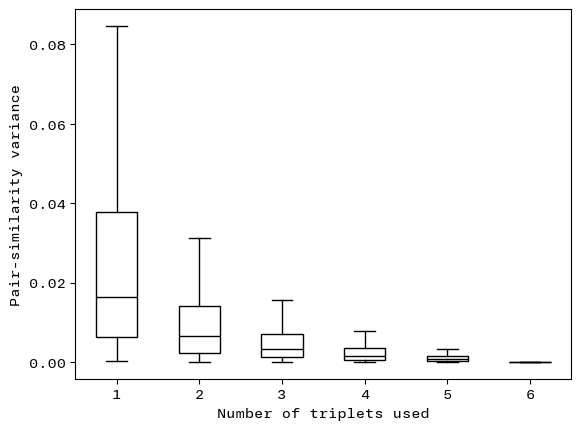

In [34]:
# Plot the STDs of all GPSMs against the size of the context (number of triplets used)

boxplot = results.plot(kind="box",
                       patch_artist=True,
                       showfliers=False,
                       boxprops=dict(facecolor="white", color=COL),
                       color=box_colors,
                       xlabel='Number of triplets used',
                       ylabel='Pair-similarity variance',
                       ).get_figure()
boxplot.savefig("graphics/effect-of-context_box-plots.pdf", bbox_inches="tight")

In [35]:
# Standard deviations
# for different context sizes
results.std()

1    0.026424
2    0.010455
3    0.005230
4    0.002595
5    0.001029
6    0.000000
dtype: float64

In [36]:
# Standard errors of the mean
# for different context sizes
results.sem()

1    0.000753
2    0.000298
3    0.000149
4    0.000074
5    0.000029
6    0.000000
dtype: float64